## Jupyter (IPython) Has Awesome Shortcuts!!

In [4]:
# Remember those bash commands??  You can use them here!!
# ! alerts the ipython notebook that this will be a bash command
!ls data

nytimes.csv


### Need help?  Press ESC then h

In [5]:
import pandas as pd
pd

<module 'pandas' from '/Applications/anaconda/lib/python2.7/site-packages/pandas/__init__.pyc'>

# Playing With NY Times Data

In [6]:
# Lets import the pandas package, call it pd
import pandas as pd
pd

<module 'pandas' from '/Applications/anaconda/lib/python2.7/site-packages/pandas/__init__.pyc'>

In [ ]:
# Using shortcuts, go to the end of read_ and press tab...
pd.read_

In [ ]:
# Using shortcuts, now place the cursor between the (), hold shift and tap tab (try tapping again)
pd.read_csv()

In [8]:
# Now lets do something fun!!!
df = pd.read_csv('data/nytimes.csv')
df.head(5)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


## Pandas is built around DataFrames
### You just created your first one!

    - A DataFrame is made up of Series, which you mght call a column
    - We will call it a feature

In [9]:
# This is a Series
df.Age

# but I only want to see the first 5 records
df.Age.head()

0    36
1    73
2    30
3    49
4    47
Name: Age, dtype: int64

In [15]:
# Lets aggregate this Series
df.Age.sum()

13516010

In [16]:
# Wow, thats really old?  Always be careful to understand what the data is saying
df.Age.mean()

29.48255064446679

### You can manipulate Series easily

In [28]:
df['impressions_squared'] = df.Impressions * df.Impressions
df['clicks_per_impression'] = df.Clicks / df.Impressions

In [29]:
# Well that wasn't extremely helpful...
# how would we get clicks per impression??
df.head(20)


,Age,Gender,Impressions,Clicks,Signed_In,impressions_squared,impressions per click,clicks_per_impression
0,36,0,3,0,1,9,0.000000,0.000000
1,73,1,3,0,1,9,0.000000,0.000000
2,30,0,3,0,1,9,0.000000,0.000000
3,49,1,3,0,1,9,0.000000,0.000000
4,47,1,11,0,1,121,0.000000,0.000000
5,47,0,11,1,1,121,0.090909,0.090909
6,0,0,7,1,0,49,0.142857,0.142857
7,46,0,5,0,1,25,0.000000,0.000000
8,16,0,3,0,1,9,0.000000,0.000000
9,52,0,4,0,1,16,0.000000,0.000000


### Lets Group and Plot the Data

In [30]:
# This is a magic command, now plot will be done in the notebook
%matplotlib inline  

In [34]:
# We can group data and aggregate it
grouped_df = df.groupby('Age').sum()

In [35]:
# Cool!  Look how many infants are reading the news!! 
grouped_df.head(2)

,Gender,Impressions,Clicks,Signed_In,impressions_squared,impressions per click,clicks_per_impression
Age,,,,,,,
0,0,685483,19480,0,4115525,3861.286179,3861.286179
7,1,26,3,5,152,0.809524,0.809524


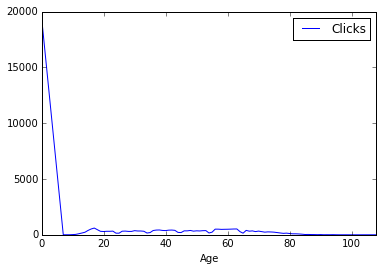

In [36]:
# Oops, thats no too pretty
grouped_df.plot(y='Clicks')

In [38]:
# This is how you filter data, lets remove those 0yr olds
# NOTE: Dont worry if this logic is confusing, Pandas hacked Python for thise filter!
grouped_df[grouped_df.index!=0].head()

,Gender,Impressions,Clicks,Signed_In,impressions_squared,impressions per click,clicks_per_impression
Age,,,,,,,
7,1,26,3,5,152,0.809524,0.809524
8,12,94,4,15,710,0.715909,0.715909
9,32,265,5,48,1689,0.739683,0.739683
10,81,544,19,113,3162,4.285714,4.285714
11,190,1442,36,283,8868,6.885354,6.885354


In [39]:
# However filtering is not done in place
# so you don't save the new dataset before you get the right filter
grouped_df = grouped_df[grouped_df.index!=0]

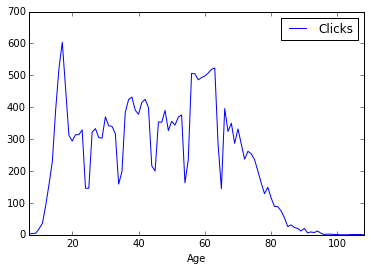

In [40]:
grouped_df.plot(y='Clicks')

## Try Playing with the data yourself!
    - What is the avergage age by gender?
    - Can you find the converison rate by Age range? 
        - A converison is an impresison that caused a click
        - Can you plot it??
        
    - What else can you learn with this data?
        - Try using the data in a new way and output your results to data/nyt_output.csv
        - HINT: df.to_csv(file_name)    

In [98]:
grouped_df_gender = df.groupby('Gender').mean()
grouped_df_gender.head()

,Age,Impressions,Clicks,Signed_In,impressions_squared,impressions per click,clicks_per_impression,count
Gender,,,,,,,,
0,22.906133,5.006555,0.105701,0.527507,30.080882,0.021110,0.021110,1
1,40.823701,5.008629,0.069991,1.000000,30.099967,0.013919,0.013919,1


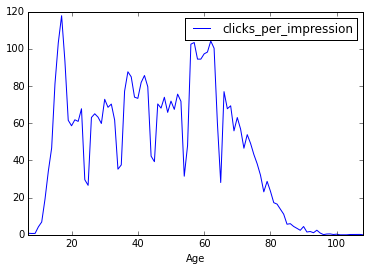

In [99]:
grouped_df.plot(y="clicks_per_impression")

In [100]:
grouped_df.head()

,Gender,Impressions,Clicks,Signed_In,impressions_squared,clicks_per_impression
Age,,,,,,
7,1,26,3,5,152,0.809524
8,12,94,4,15,710,0.715909
9,32,265,5,48,1689,0.739683
10,81,544,19,113,3162,4.285714
11,190,1442,36,283,8868,6.885354


,Age,Gender,Impressions,Clicks,Signed_In,impressions_squared,impressions per click,clicks_per_impression,count
0,36,0,3,0,1,9,0,0,1
1,73,1,3,0,1,9,0,0,1
2,30,0,3,0,1,9,0,0,1
3,49,1,3,0,1,9,0,0,1
4,47,1,11,0,1,121,0,0,1


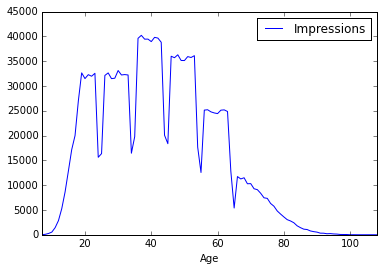

In [84]:
age_group = df.groupby('Age').sum()
age_group = age_group[age_group.index!=0]
age_group.plot(y="Impressions")